## Getting the data

In [1]:
import zipfile

# downloading zip file of pizza_steak images
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()


--2025-01-18 15:53:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  89.1MB/s    in 1.2s    

2025-01-18 15:54:00 (89.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecting the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through the pizza_steak directory and list number of files and directories
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
num_steak_imgs_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_imgs_train

750

In [7]:
num_pizza_imgs_train = len(os.listdir('pizza_steak/train/pizza'))
num_pizza_imgs_train

750

In [8]:
num_steak_imgs_test = len(os.listdir('pizza_steak/test/steak'))
num_steak_imgs_test

250

In [9]:
num_pizza_imgs_test = len(os.listdir('pizza_steak/test/pizza'))
num_pizza_imgs_test

250

In [10]:
# get classes names
directory_path = 'pizza_steak/train/'

folders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

folders.sort()
folders
classes = folders

## Viewing the data

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.axis(False)
  plt.title(target_class)
  plt.imshow(img)

  return img




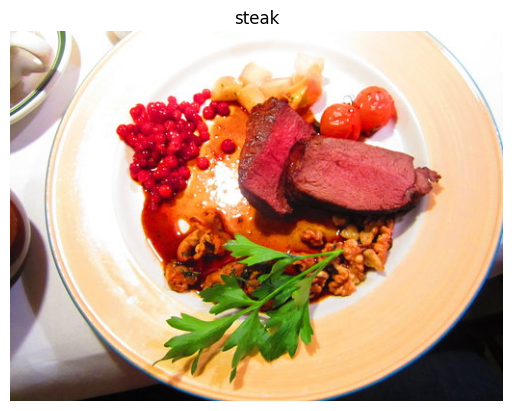

In [12]:
img = view_random_image('pizza_steak/train/', 'steak')

array([[[235, 228, 222],
        [238, 231, 225],
        [238, 233, 229],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       [[237, 232, 228],
        [239, 234, 230],
        [240, 235, 231],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       [[242, 237, 233],
        [243, 238, 234],
        [244, 239, 235],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[ 61,  49,  27],
        [ 60,  48,  26],
        [ 60,  48,  24],
        ...,
        [ 17,  18,  23],
        [ 16,  17,  22],
        [ 14,  15,  20]],

       [[ 60,  48,  26],
        [ 59,  47,  25],
        [ 59,  47,  23],
        ...,
        [ 19,  20,  25],
        [ 17,  18,  23],
        [ 15,  16,  21]],

       [[ 60,  48,  26],
        [ 59,  47,  25],
        [ 58,  46,  24],
        ...,
        [ 19,  20,  25],
        [ 17,  18,  23],
        [ 15,  16,  21]]], dtype=uint8)
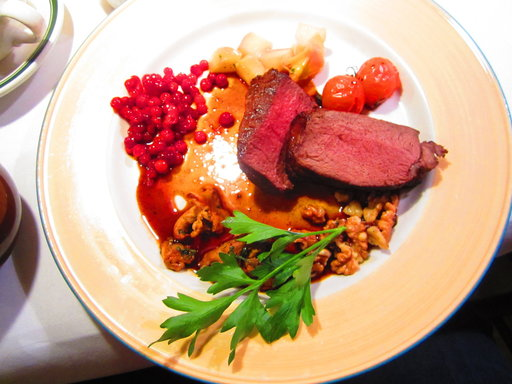

In [13]:
img

In [14]:
img.shape

(384, 512, 3)

## *A* (typical) architecture of a convolutional neural network


In [17]:
import tensorflow as tf


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
tf.random.set_seed(42)

#preprocess data, normalize

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

#import data from directories into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size= (224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size= (224,224),
                                               class_mode = 'binary',
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output

])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


history_1 = model_1.fit(train_data,
                        epochs=10,
                        validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5871 - loss: 0.6554 - val_accuracy: 0.8140 - val_loss: 0.4060
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7872 - loss: 0.4481 - val_accuracy: 0.8600 - val_loss: 0.3534
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8260 - loss: 0.3967 - val_accuracy: 0.8620 - val_loss: 0.3296
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8548 - loss: 0.3616 - val_accuracy: 0.8720 - val_loss: 0.3377
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8707 - loss: 0.3359 - val_accuracy: 0.8420 - val_loss: 0.3466
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8784 - loss: 0.3171 - val_accuracy: 0.8260 - val_loss: 0.3704
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8800 - loss: 0.2982 - val_accuracy: 0.8700 - val_loss: 0.2969
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9229 - loss: 0.2149 - val_accuracy: 0.8740 - val_loss: 0.

In [21]:
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Going through each step again

### Visualizing data

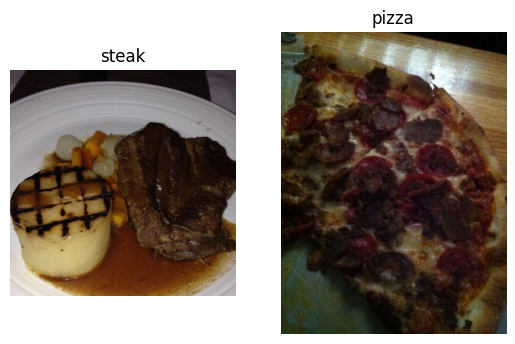

In [22]:
#visualizing the data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### Preprocessing data

In [23]:
#define training and test directory paths

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [24]:
# To trun our data into batches
# we'll first create an instance of ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [25]:
# Turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of the training data patch

images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [27]:
images, labels = next(train_data)
print(images.shape, labels.shape)


(32, 224, 224, 3) (32,)


In [29]:
images[0].shape
images[0]

array([[[0.95294124, 0.8862746 , 0.8235295 ],
        [0.9490197 , 0.882353  , 0.8196079 ],
        [0.9490197 , 0.882353  , 0.8196079 ],
        ...,
        [0.5686275 , 0.4666667 , 0.40000004],
        [0.5372549 , 0.44705886, 0.38431376],
        [0.5411765 , 0.45098042, 0.39607847]],

       [[0.95294124, 0.8862746 , 0.8235295 ],
        [0.9490197 , 0.882353  , 0.8196079 ],
        [0.9490197 , 0.882353  , 0.8196079 ],
        ...,
        [0.54901963, 0.4431373 , 0.36862746],
        [0.5882353 , 0.48627454, 0.427451  ],
        [0.5176471 , 0.427451  , 0.3647059 ]],

       [[0.9686275 , 0.90196085, 0.8313726 ],
        [0.9686275 , 0.90196085, 0.8313726 ],
        [0.9607844 , 0.8941177 , 0.8235295 ],
        ...,
        [0.5803922 , 0.47450984, 0.40000004],
        [0.62352943, 0.5176471 , 0.45098042],
        [0.5529412 , 0.45098042, 0.38431376]],

       ...,

       [[0.7568628 , 0.69411767, 0.6313726 ],
        [0.7568628 , 0.7058824 , 0.6392157 ],
        [0.7254902 , 0

In [30]:
labels

array([1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

### Creating a baseline model

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

from tensorflow.keras import Sequential



In [32]:
# our model = input layer -> Conv2D -> Conv2D -> Conv2D -> Flatten -> Dense
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation = 'relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,1, activation='relu'),
    Conv2D(10,3,1, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [33]:
# Compiling the model
model_2.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [34]:
# Fitting a model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        validation_data = test_data,
                        )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.6345 - loss: 0.9811 - val_accuracy: 0.8320 - val_loss: 0.3895
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8215 - loss: 0.4247 - val_accuracy: 0.8160 - val_loss: 0.3772
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8987 - loss: 0.2644 - val_accuracy: 0.8300 - val_loss: 0.3490
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9728 - loss: 0.1243 - val_accuracy: 0.8340 - val_loss: 0.3864
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9938 - loss: 0.0355 - val_accuracy: 0.8280 - val_loss: 0.5136


### Evaluating the model

<Axes: >

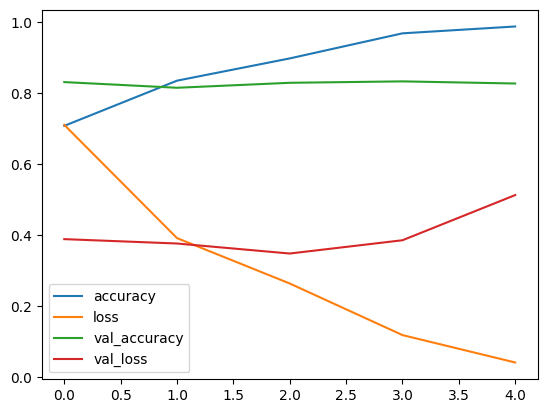

In [35]:
# Plotting training curves

import pandas as pd
pd.DataFrame(history_2.history).plot()

When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset.

In [36]:
# Plotting the validation and training data separately

def plot_loss_curves(history):
  import matplotlib.pyplot as plt

  accuracy = history.history['accuracy']
  loss = history.history['loss']
  val_accuracy = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label = 'training loss')
  plt.plot(epochs, val_loss, label = 'validation loss')

  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


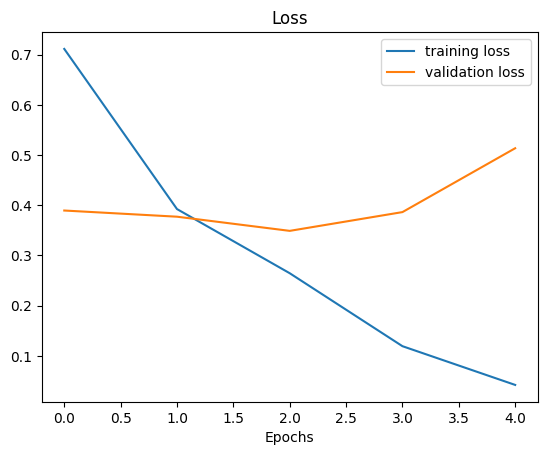

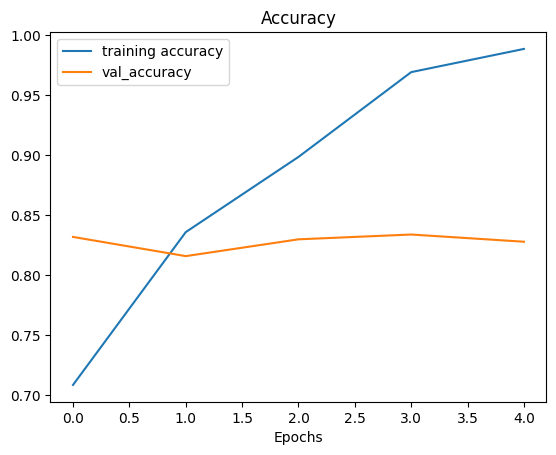

In [37]:
#checking out loss curves of model_2
plot_loss_curves(history_2)


The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means model is probably overfitting.

In [38]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

### Adjusting model parameters

we'll build 2 more models:

1- A ConvNet with max pooling

2- A ConvNet with max pooling and data augmentation

### 1- A ConvNet with max pooling

In [39]:
# last model = input layer -> Conv2D -> Conv2D -> Conv2D -> Flatten -> Dense
# let's add a MaxPooling2D layer after each Conv2D
# This model = input layer -> Conv2D -> MaxPooling2d -> Conv2D -> MaxPooling2d -> Conv2D -> MaxPooling2d -> Flatten -> Dense
model_3 = Sequential([
    Conv2D(10,3,1,input_shape=(224,224,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10,3,1,activation='relu'),
    MaxPooling2D(),
    Conv2D(10,3,1,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features.

In [40]:
# Compiling model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
# Fitting the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5936 - loss: 0.6771 - val_accuracy: 0.7960 - val_loss: 0.4447
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7548 - loss: 0.4764 - val_accuracy: 0.8360 - val_loss: 0.4021
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7950 - loss: 0.4338 - val_accuracy: 0.8380 - val_loss: 0.3769
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8050 - loss: 0.4177 - val_accuracy: 0.8720 - val_loss: 0.3468
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8391 - loss: 0.3859 - val_accuracy: 0.8460 - val_loss: 0.3753


In [42]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

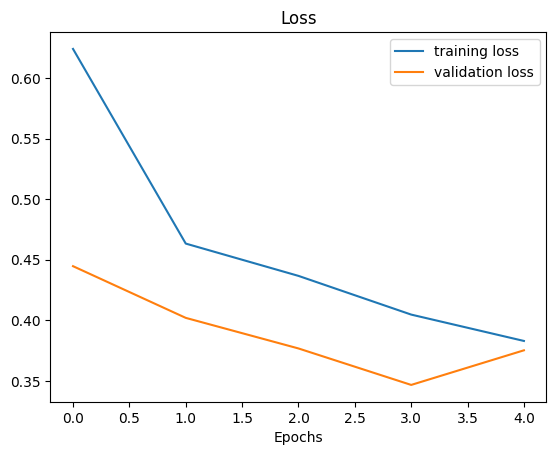

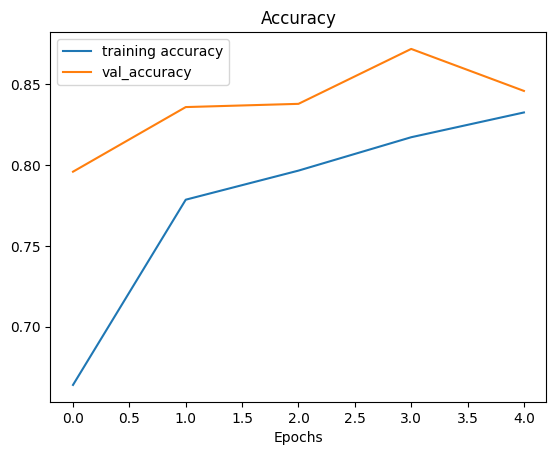

In [43]:
plot_loss_curves(history_3)

### Making predictions

In [44]:
# a function to import an image and preprocess it
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, color_channels)
  """

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [45]:
from google.colab import drive, files

In [46]:
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
uploaded = files.upload()

Saving pizza.jpg to pizza.jpg
Saving test.jpg to test.jpg
Saving test2.jpeg to test2.jpeg
Saving test3.jpeg to test3.jpeg
Saving test4.jpeg to test4.jpeg
Saving test5.jpg to test5.jpg
Saving test6.jpeg to test6.jpeg
Saving test7.jpeg to test7.jpeg
Saving test8.jpeg to test8.jpeg
Saving test9.jpeg to test9.jpeg
Saving test10.jpeg to test10.jpeg


In [50]:
pizza_test_img = load_and_prep_image('/content/pizza.jpg')

pizza_test_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00392157, 0.00392157, 0.00392157],
        [0.0072429 , 0.0072429 , 0.0072429 ],
        [0.00504202, 0.00504202, 0.00504202],
        ...,
        [0.19547854, 0.31304684, 0.32675165],
        [0.21317539, 0.27477843, 0.3093137 ],
        [0.17419043, 0.252202  , 0.26788828]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.0057423 , 0.0057423 , 0.0057423 ],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.28187698, 0.37553412, 0.3846778 ],
        [0.08422154, 0.15162979, 0.17986122],
        [0.06508796, 0.12745358, 0.13991864]],

       [[0.        , 0.        , 0.        ],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.15984398, 0.20942299, 0.22370899],
        [0.14571215, 0.23228893, 0.24901576],
        [0.0008004 , 0.01520674, 0.02513075]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00

In [52]:

pred = model_3.predict(tf.expand_dims(pizza_test_img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [53]:
pred

array([[0.45924228]], dtype=float32)

In [54]:
classes

['pizza', 'steak']

In [55]:
# We can index the predicted class by rounding the prediction probability
pred_class = classes[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [56]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


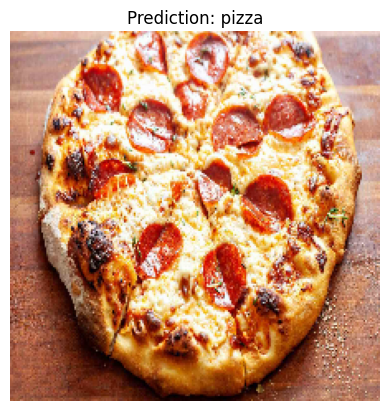

In [57]:
pred_and_plot(model_3, "test.jpg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


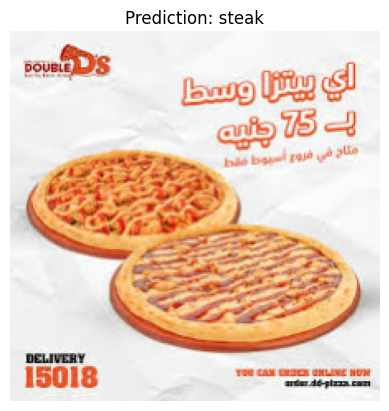

In [58]:
pred_and_plot(model_3, "test2.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


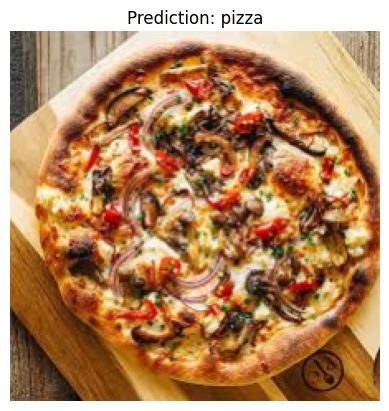

In [59]:
pred_and_plot(model_3, "test3.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


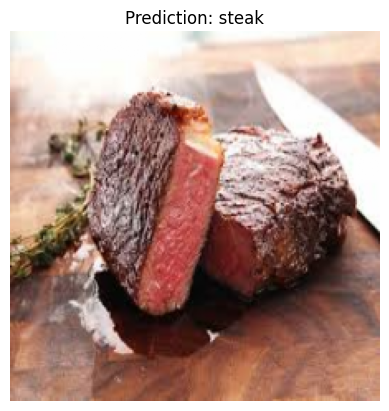

In [60]:
pred_and_plot(model_3, "test4.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


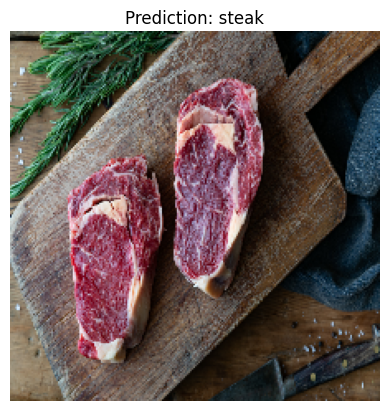

In [61]:
pred_and_plot(model_3, "test5.jpg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


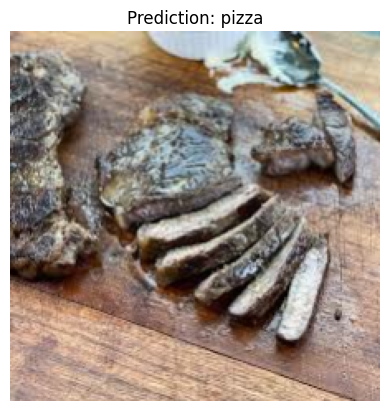

In [62]:
pred_and_plot(model_3, "test6.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


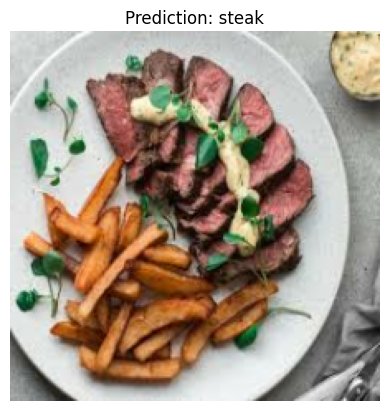

In [63]:
pred_and_plot(model_3, "test7.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


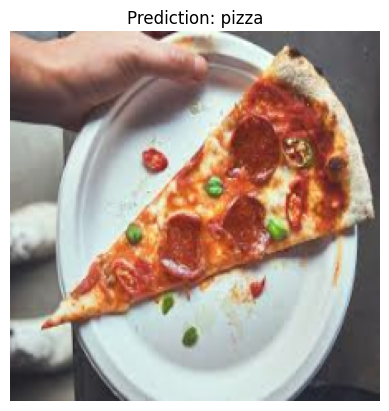

In [64]:
pred_and_plot(model_3, "test8.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


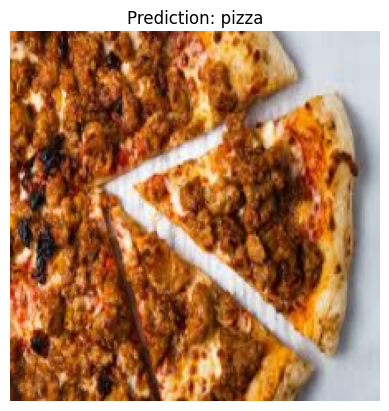

In [65]:
pred_and_plot(model_3, "test9.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


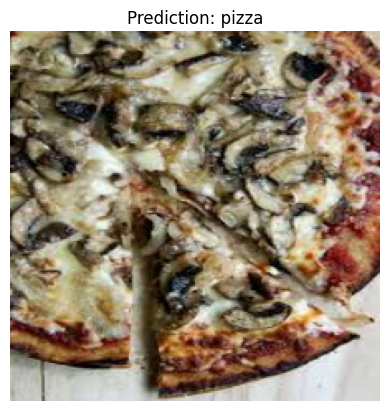

In [66]:
pred_and_plot(model_3, "test10.jpeg", classes)


We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

### Let's try Data Augmentation

In [100]:
#training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range = 20,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

#training instance without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#test instance without augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [101]:
print('Augmented training images:')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   (224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)


print('Non-Augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               (224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print('Test Images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmented training images:
Found 1500 images belonging to 2 classes.
Test Images:
Found 500 images belonging to 2 classes.


In [102]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(-0.5, 223.5, 223.5, -0.5)

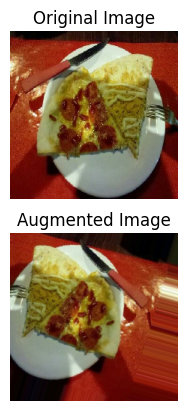

In [104]:
#show original and augmented image
random_number = random.randint(0, 31)
plt.figure()
plt.subplot(2,1,1)
plt.imshow(images[random_number])

plt.title('Original Image')

plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(augmented_images[random_number])

plt.title('Augmented Image')

plt.axis('off')


In [105]:
#let's shuffle our augmented data (I did not shuffle just for demonstration)

print('Augmented training images:')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   (224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)


print('Non-Augmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               (224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print('Test Images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')



Augmented training images:
Found 1500 images belonging to 2 classes.
Non-Augmented training images:
Found 1500 images belonging to 2 classes.
Test Images:
Found 500 images belonging to 2 classes.


In [106]:
train_data

When using data augmentation in TensorFlow, you typically provide only the augmented data to the model during training. Here's why:

Why Use Only Augmented Data

1- Augmentation is Applied on-the-Fly:

* If you're using a tool like ImageDataGenerator or image_dataset_from_directory with augmentation parameters, the original data is automatically augmented during training.

* Each epoch sees a slightly different version of the data due to augmentation, effectively using the augmented data as a form of regularization.

2- Augmentation Enhances Generalization:

* The goal of augmentation is to artificially increase the diversity of the dataset to make the model more robust to variations.

* Training on augmented data helps the model generalize better to unseen data, which reduces overfitting.

3- Original Data is Included in Augmentation:

* Augmented datasets inherently include the original data because many augmentation techniques leave some images unchanged, particularly when using subtle augmentations.

In [107]:
# The only difference between the previous model and this one, is the augmented data
model_4 = Sequential([
    Conv2D(10,3, activation='relu', input_shape = (224,224,3)),
    MaxPooling2D(),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

#fitting the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        validation_data = test_data)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5623 - loss: 0.6741 - val_accuracy: 0.7620 - val_loss: 0.5027
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7085 - loss: 0.5600 - val_accuracy: 0.7740 - val_loss: 0.4709
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7279 - loss: 0.5225 - val_accuracy: 0.8360 - val_loss: 0.3807
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7261 - loss: 0.5568 - val_accuracy: 0.7700 - val_loss: 0.4578
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7814 - loss: 0.4761 - val_accuracy: 0.8580 - val_loss: 0.3251


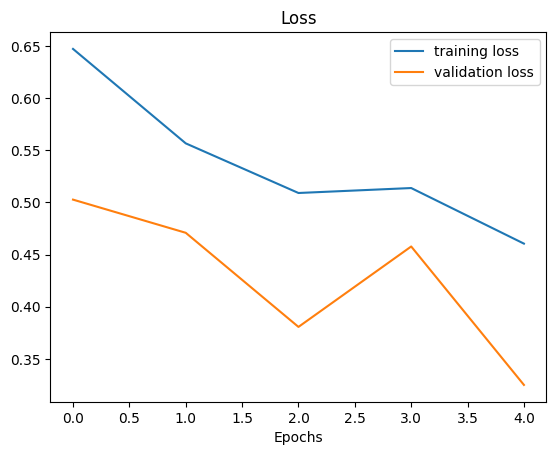

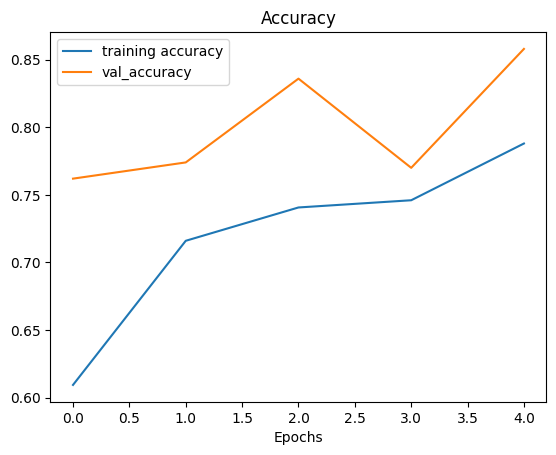

In [108]:
plot_loss_curves(history_4)

### Enhancing model

In [109]:
# Adding more Conv2D layers and increasing epochs
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape = (224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

#fitting the model
history_5 = model_5.fit(train_data_augmented,
                        epochs=10,
                        validation_data = test_data)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.5403 - loss: 0.6907 - val_accuracy: 0.5980 - val_loss: 0.6407
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.6491 - loss: 0.6297 - val_accuracy: 0.7400 - val_loss: 0.5285
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.7170 - loss: 0.5688 - val_accuracy: 0.8340 - val_loss: 0.4076
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7623 - loss: 0.4998 - val_accuracy: 0.8360 - val_loss: 0.3769
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7679 - loss: 0.4887 - val_accuracy: 0.7440 - val_loss: 0.5105
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.7334 - loss: 0.5300 - val_accuracy: 0.8260 - val_loss: 0.4004
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.7868 - loss: 0.4788 - val_accuracy: 0.8620 - val_loss: 0.3309
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.8046 - loss: 0.4542 - val_accuracy: 0.8380 - v

In [110]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 51, 51, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 49, 49, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 24, 24, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           5,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,775 (124.12 KB)

 Trainable params: 10,591 (41.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,184 (82.75 KB)

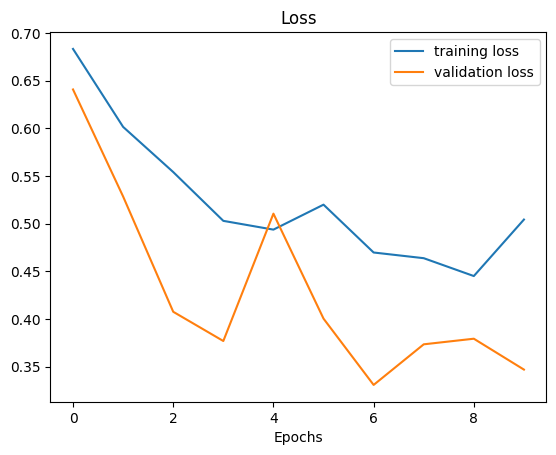

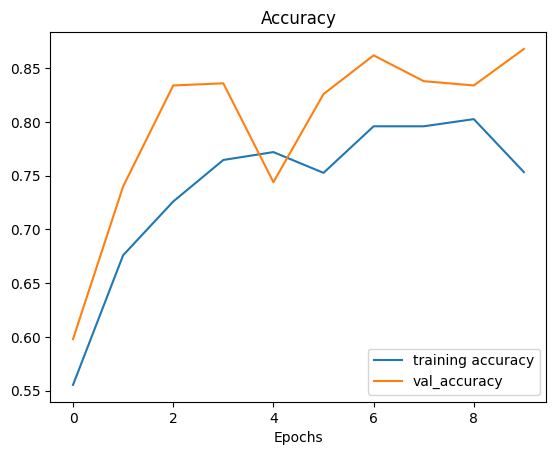

In [111]:
plot_loss_curves(history_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


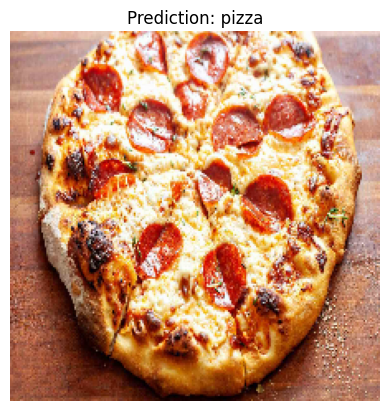

In [112]:
pred_and_plot(model_5, "test.jpg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


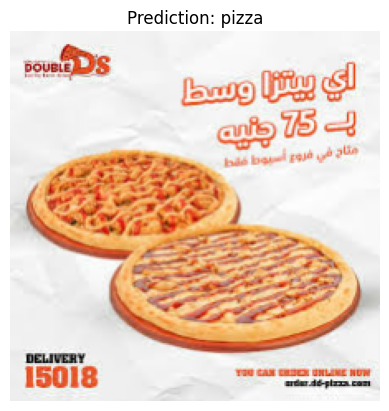

In [113]:
pred_and_plot(model_5, "test2.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


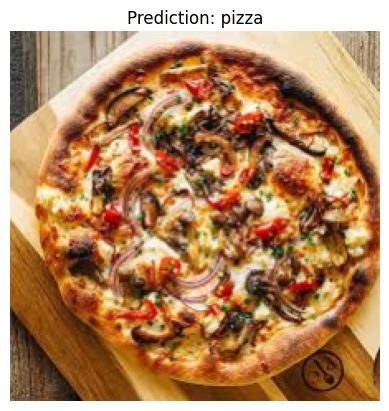

In [114]:
pred_and_plot(model_5, "test3.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


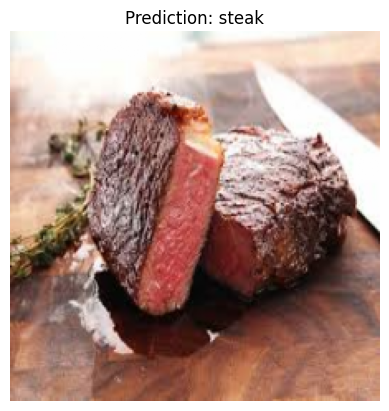

In [115]:
pred_and_plot(model_5, "test4.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


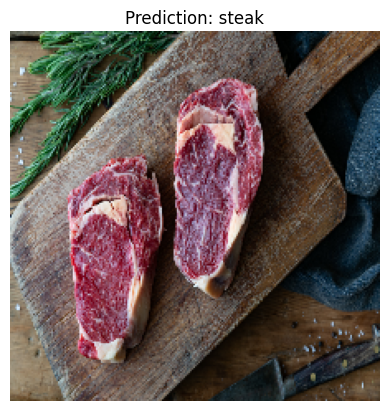

In [116]:
pred_and_plot(model_5, "test5.jpg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


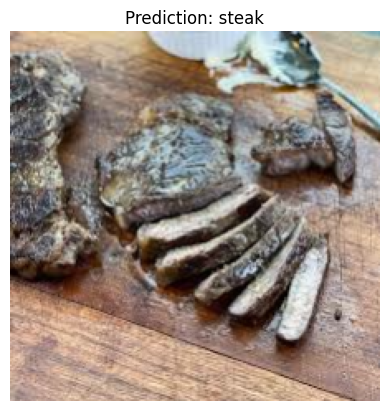

In [117]:
pred_and_plot(model_5, "test6.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


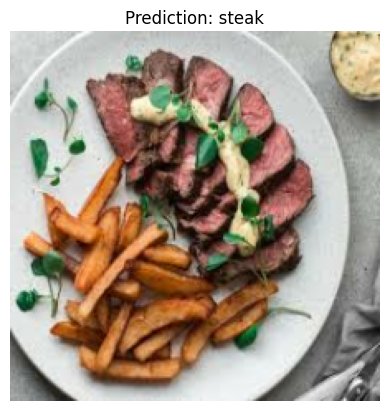

In [118]:
pred_and_plot(model_5, "test7.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


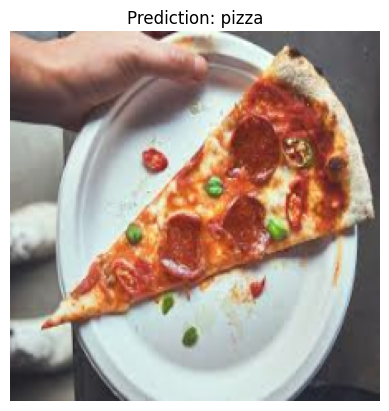

In [119]:
pred_and_plot(model_5, "test8.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


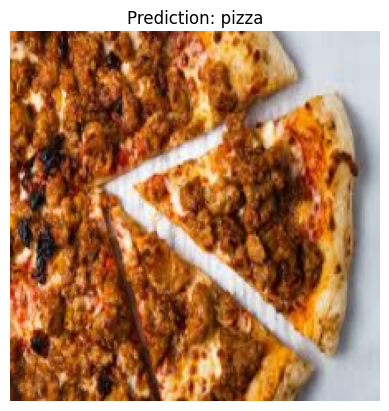

In [120]:
pred_and_plot(model_5, "test9.jpeg", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


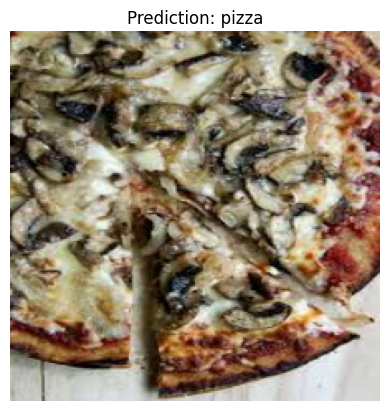

In [121]:
pred_and_plot(model_5, "test10.jpeg", classes)


### Conclusion

Perfect, our model performs better than before on new images!